# Titanic

### Importation les bibliothèques nécessaires

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Chargement des données:

In [8]:
print("Chargement des données...")
data = pd.read_csv("train.csv")

print("Données d'entraînement :")
print(data.head())

Chargement des données...
Données d'entraînement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4   

###  Nettoyage et Prétraitement des données

In [11]:
# Identifier les colonnes avec des valeurs manquantes
colonnes_manquantes = data.isnull().sum()
colonnes_manquantes = colonnes_manquantes[colonnes_manquantes > 0].sort_values(ascending=False)
print("Colonnes avec des valeurs manquantes :")
print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
Cabin       687
Age         177
Embarked      2
dtype: int64


In [13]:
# Remplir les valeurs manquantes
for colonne in colonnes_manquantes.index:
    if data[colonne].dtype == "object":
        data[colonne] = data[colonne].fillna("None")
    else:
        data[colonne] = data[colonne].fillna(data[colonne].median())

In [15]:
# Encoder les variables catégoriques
data = pd.get_dummies(data, drop_first=True)

In [17]:
# Séparer les variables indépendantes et la cible
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [19]:
# Division en jeu d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

###  Analyse exploratoire et Visualisation

Analyse exploratoire...


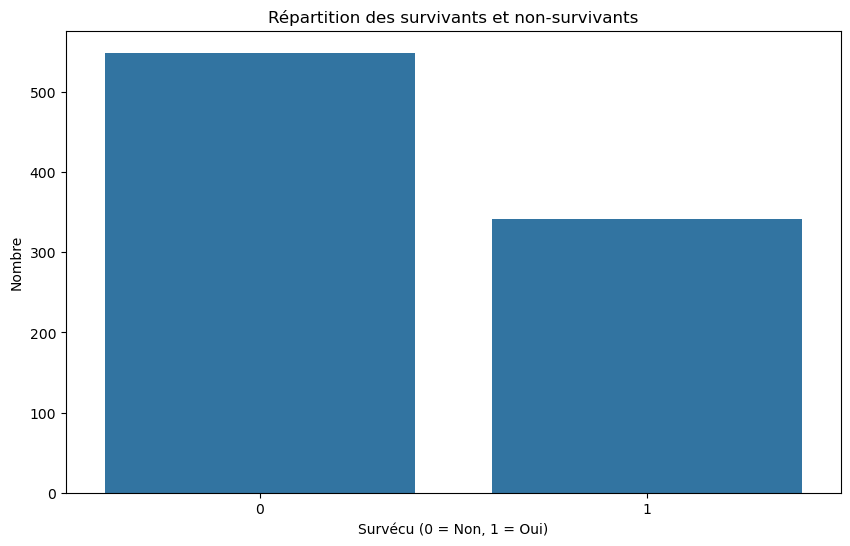

In [22]:
print("Analyse exploratoire...")
plt.figure(figsize=(10, 6))
sns.countplot(x="Survived", data=data)
plt.title("Répartition des survivants et non-survivants")
plt.xlabel("Survécu (0 = Non, 1 = Oui)")
plt.ylabel("Nombre")
plt.show()

### Modèles

In [27]:
# Modèle Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Performance du modèle Random Forest : Accuracy = {accuracy_rf:.4f}")


Performance du modèle Random Forest : Accuracy = 0.8212


Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



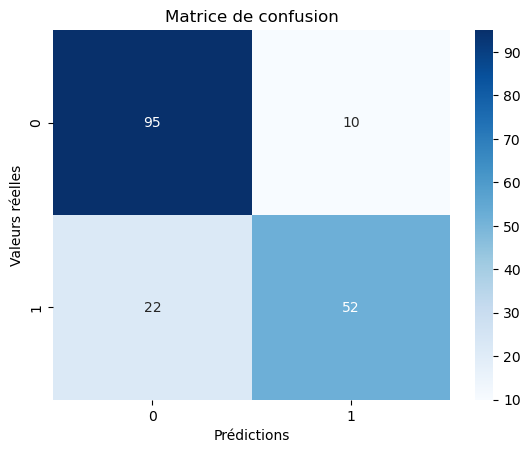

In [29]:
# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_val, y_pred_rf))

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()


### conclusion